In [1]:
import numpy as np 
import pandas as pd 
import os

# Change the working directory
os.chdir('C:/Users/Administrator/Desktop/MyScripts/MIFD/Test & Train')

In [2]:
# Load Train Dataset

Train=pd.read_excel('MFD Train.xlsx', sheet_name='Train_Provider')
Train_Beneficiarydata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Beneficiary_Data')
Train_Inpatientdata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Inpatient_Data')
Train_Outpatientdata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Outpatient_Data')

In [3]:
# Load Test Dataset

Test=pd.read_excel("MFD Test.xlsx", sheet_name='Test_Provider')
Test_Beneficiarydata=pd.read_excel("MFD Test.xlsx", sheet_name='Test_Beneficiary_Data')
Test_Inpatientdata=pd.read_excel('MFD Test.xlsx', sheet_name='Test_Inpatient_Data')
Test_Outpatientdata=pd.read_excel("MFD Test.xlsx", sheet_name='Test_Outpatient_Data')

In [4]:
print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [5]:
## Lets check shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [6]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())

Provider
PRV51001    1
PRV55516    1
Name: count, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


In [7]:
Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [8]:
Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                      object
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [9]:

#Replacing 2 with 0 for chronic conditions ,that means chronic condition "No" is 0 and "yes" is 1

#FOR GENDER 1: Male 2:Female

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\2374856404.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\2374856404.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)


In [10]:
Train_Beneficiarydata.head(10)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11002 1936-09-01        NaT       2     1                      0   
2  BENE11003 1936-08-01        NaT       1     1                      0   
3  BENE11004 1922-07-01        NaT       1     1                      0   
4  BENE11005 1935-09-01        NaT       1     1                      0   
5  BENE11006 1976-09-01        NaT       2     1                      0   
6  BENE11007 1940-09-01 2009-12-01       1     2                      0   
7  BENE11008 1934-02-01        NaT       2     1                      0   
8  BENE11009 1929-06-01        NaT       1     1                      1   
9  BENE11010 1936-07-01        NaT       2     1                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     39     280                   12                   12  ...   
2     52     590                   12                   12  ...   
3     39     270                   12                   12  ...   
4     24     680                   12                   12  ...   
5     23     810                   12                   12  ...   
6     45     610                   12                   12  ...   
7     15     140                   12                   12  ...   
8     44     230                   12                   12  ...   
9     41      30                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          0   
2                       0                     0                          1   
3                       0                     1                          1   
4                       0                     1                          0   
5                       0                     0                          0   
6                       0                     1                          0   
7                       0                     1                          0   
8                       0                     1                          0   
9                       0                     1                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                1   
4                         0                                0   
5                         0                                0   
6                         1                                1   
7                         0                                0   
8                         0                                0   
9                         1                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   0                         0                      0   
4                   0                         0                      0   
5                   0                         0                      0   
6                   0                         0                      0   
7                   0                         0                      0   
8                   0                         0                      0   
9                   0                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0         

In [11]:
Test_Beneficiarydata.head(10)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11007 1940-09-01 2009-12-01       1     2                      0   
2  BENE11010 1936-07-01        NaT       2     1                      0   
3  BENE11011 1914-03-01        NaT       2     2                      0   
4  BENE11014 1938-04-01        NaT       2     1                      1   
5  BENE11016 1919-09-01        NaT       2     2                      0   
6  BENE11017 1940-06-01        NaT       2     1                      0   
7  BENE11019 1924-05-01        NaT       1     3                      0   
8  BENE11021 1927-12-01        NaT       1     3                      0   
9  BENE11026 1938-04-01        NaT       1     1                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   
2     41      30                   12                   12  ...   
3      1     360                   12                   12  ...   
4     45     780                   12                   12  ...   
5     34     400                   12                   12  ...   
6     31     270                   12                   12  ...   
7      7      50                   12                   12  ...   
8      7      20                   12                   12  ...   
9     22      20                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     1                          0   
2                       0                     1                          1   
3                       1                     1                          0   
4                       1                     0                          1   
5                       0                     1                          1   
6                       0                     1                          1   
7                       1                     1                          1   
8                       1                     1                          1   
9                       0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         1                                1   
2                         1                                0   
3                         0                                1   
4                         0                                0   
5                         1                                0   
6                         0                                1   
7                         1                                0   
8                         1                                1   
9                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   1                      5000                   1068   
4                   0                     21260                   2136   
5                   1                         0                      0   
6                   1                     22000                   2136   
7                   0                         0                      0   
8                   0                         0                      0   
9                   0                      2000                   1068   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0         

In [12]:
# Lets Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%d/%m/%Y')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%d/%m/%Y',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%d/%m/%Y')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%d/%m/%Y',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\1611391028.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%d/%m/%Y',errors='ignore')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\1611391028.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%d/%m/%Y',errors='ignore')


In [13]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11007 1940-09-01 2009-12-01       1     2                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   

   OPAnnualDeductibleAmt   Age  
0                     70   NaN  
1                    160  69.0  

[2 rows x 26 columns]

In [14]:
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: WhetherDead, dtype: float64

In [15]:
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Test_Beneficiarydata.loc[:,'WhetherDead'].head(3)

0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64

In [16]:
# checking the missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()
Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [17]:
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1

In [18]:
Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [19]:
## Checking Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [20]:
#checking null values in each columnn of outpatient data
Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [21]:
## Lets Check Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


In [22]:
merge_keys=Train_Outpatientdata.columns
print(merge_keys)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [23]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [24]:
print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [25]:
Train_Allpatientdata.head(4)
Test_Allpatientdata.head(4)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100001  CLM129501   2009-01-10 2009-01-10  PRV52050   
1  BENE100002  CLM623189   2009-10-10 2009-10-10  PRV52083   
2  BENE100004  CLM546697   2009-08-26 2009-09-15  PRV53275   
3  BENE100004   CLM63603   2009-08-12 2009-08-17  PRV52959   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    1100          PHY364771                NaN   
1                      60          PHY402651                NaN   
2                    1500          PHY364921                NaN   
3                   11000          PHY410241                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_3  \
0            NaN               V074  ...                NaN   
1      PHY315572              V5867  ...                NaN   
2      PHY364921              V5631  ...                NaN   
3            NaN              69514  ...                NaN   

  ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6 DeductibleAmtPaid  \
0                NaN                NaN                NaN               0.0   
1                NaN                NaN                NaN               0.0   
2                NaN                NaN                NaN             200.0   
3                NaN                NaN                NaN            1068.0   

  ClmAdmitDiagnosisCode AdmissionDt DischargeDt DiagnosisGroupCode  \
0                   NaN         NaT         NaT                NaN   
1                   NaN         NaT         NaT                NaN   
2                   NaN         NaT         NaT                NaN   
3                   539  2009-08-12  2009-08-17                579   

   AdmitForDays  
0           NaN  
1           NaN  
2           NaN  
3           6.0  

[4 rows x 31 columns]

In [26]:
## Merging All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')
Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [27]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100001  CLM129501   2009-01-10 2009-01-10  PRV52050   
1  BENE100002  CLM623189   2009-10-10 2009-10-10  PRV52083   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    1100          PHY364771                NaN   
1                      60          PHY402651                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0            NaN               V074  ...                         1   
1      PHY315572              V5867  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        1                               0                  1   
1                        0                               0                  1   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                     2530   
1                    12250                  1068                     1760   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                   540 NaN          0.0  
1                   660 NaN          0.0  

[2 rows x 57 columns]

In [28]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [29]:
# Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
#Test_ProviderWithPatientDetailsdata.head()

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


In [30]:
### Lets check missing value percentage in full datasets

#print('Percent missing values in Train Provider with patient details data :\n')
Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)


print('Percent missing values in Test Provider with patient details data :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [31]:
## Lets Check dtypes of both the datasets
Train_ProviderWithPatientDetailsdata.dtypes
Test_ProviderWithPatientDetailsdata.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Percent Distribution of Potential Fraud class:- 
 PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


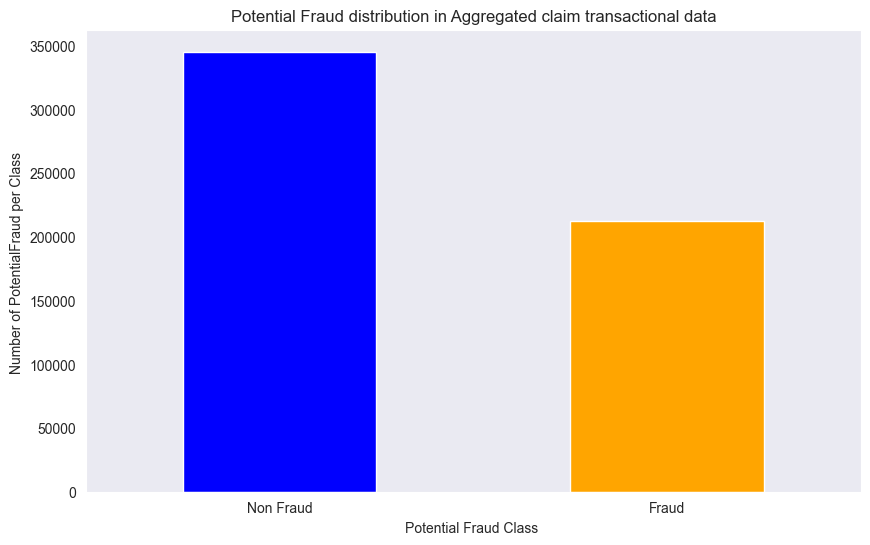

In [33]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data
data = Train_ProviderWithPatientDetailsdata
sns.set_style('dark',rc={'figure.figsize':(12,8)})
count_classes = data['PotentialFraud'].value_counts()
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(data))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6),color=['blue','orange'])

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')


Percent Distribution of Potential Fraud class:- 
 PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


Text(0, 0.5, 'Number of PotentialFraud per Class ')

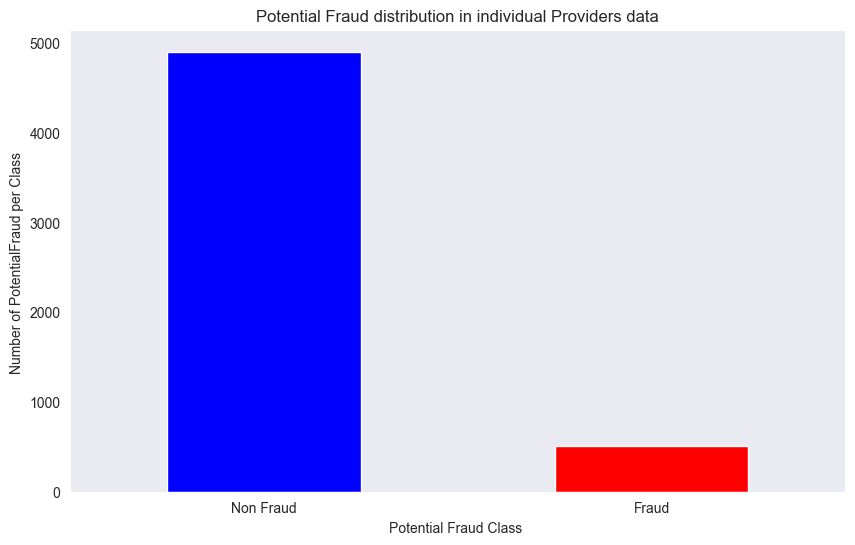

In [34]:
#PLotting the frequencies of fraud and non-fraud transactions in the train data
count_classes_provider = Train['PotentialFraud'].value_counts()
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6),color=['blue','red'])

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

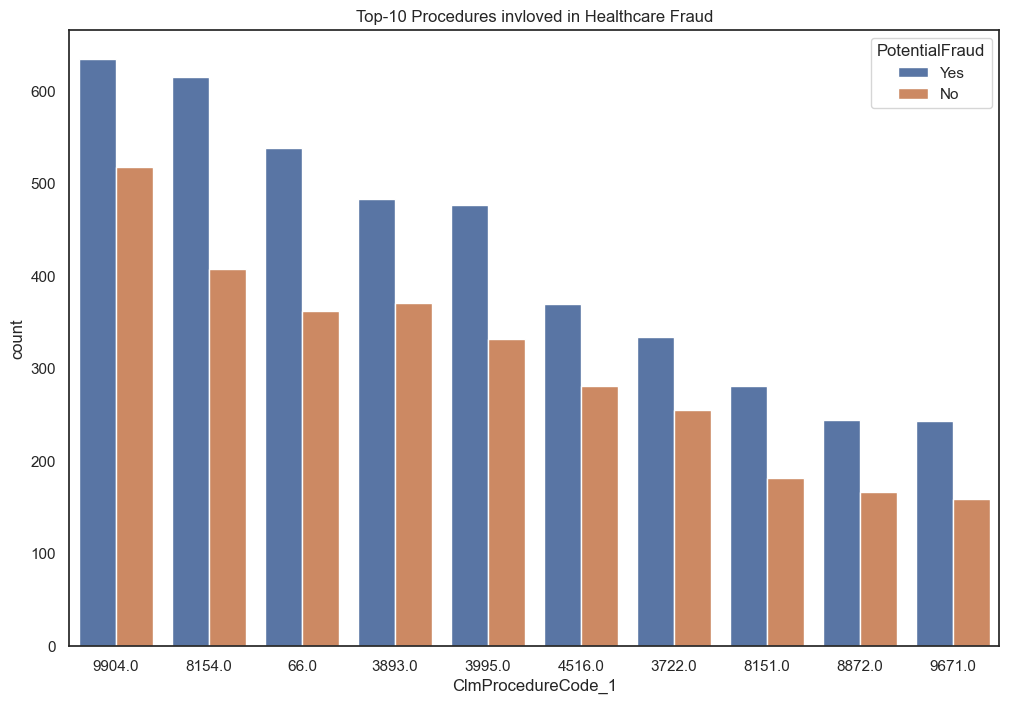

<Figure size 1200x800 with 0 Axes>

In [35]:
#plot countplot for each fraud non fraud categories

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=data
              ,order=data.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

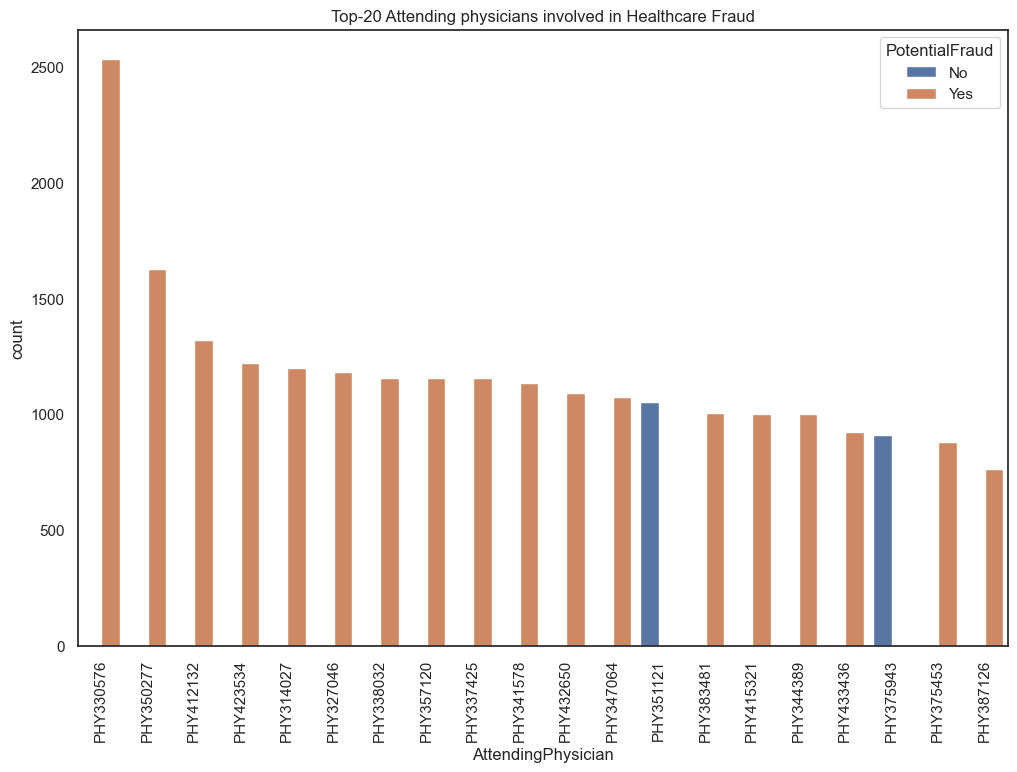

<Figure size 1200x800 with 0 Axes>

In [36]:
### lets plot Top-20 Attending Physicians involved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=data
              ,order=data.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians involved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

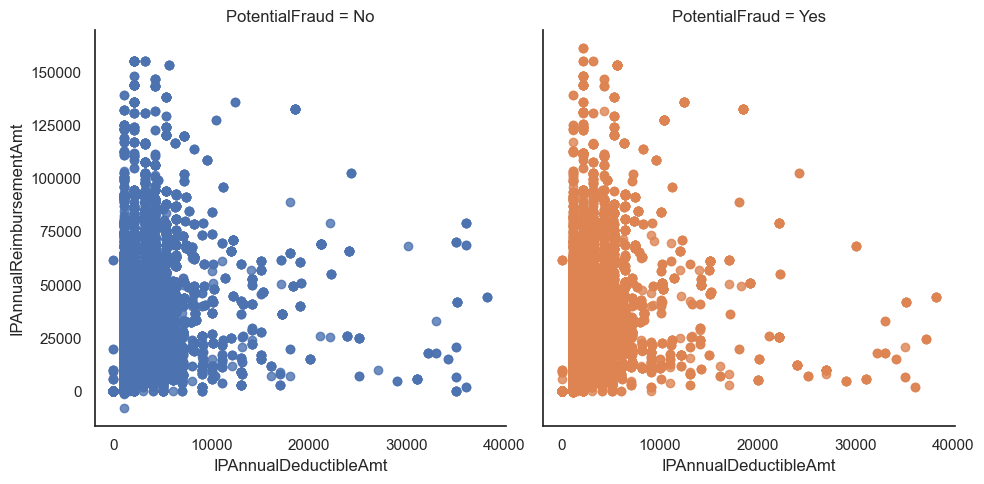

In [37]:
#Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=data)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

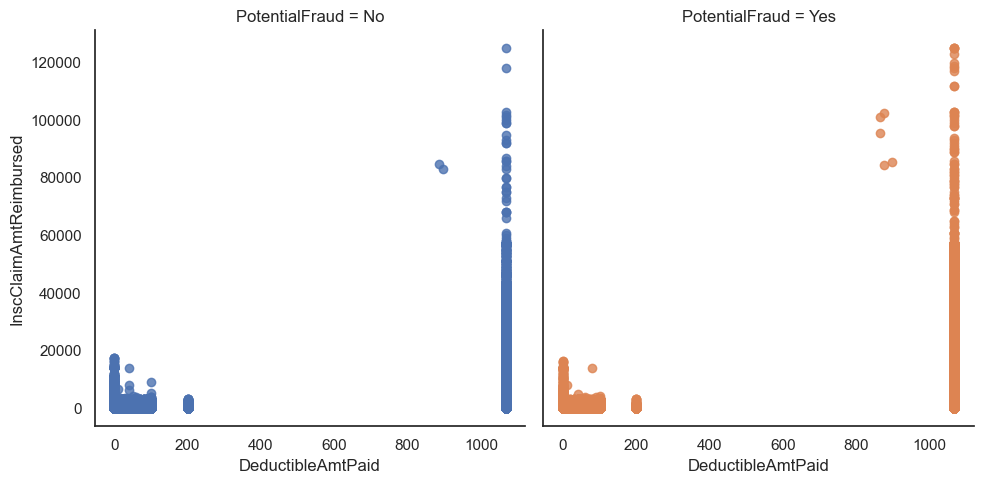

In [38]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=data)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

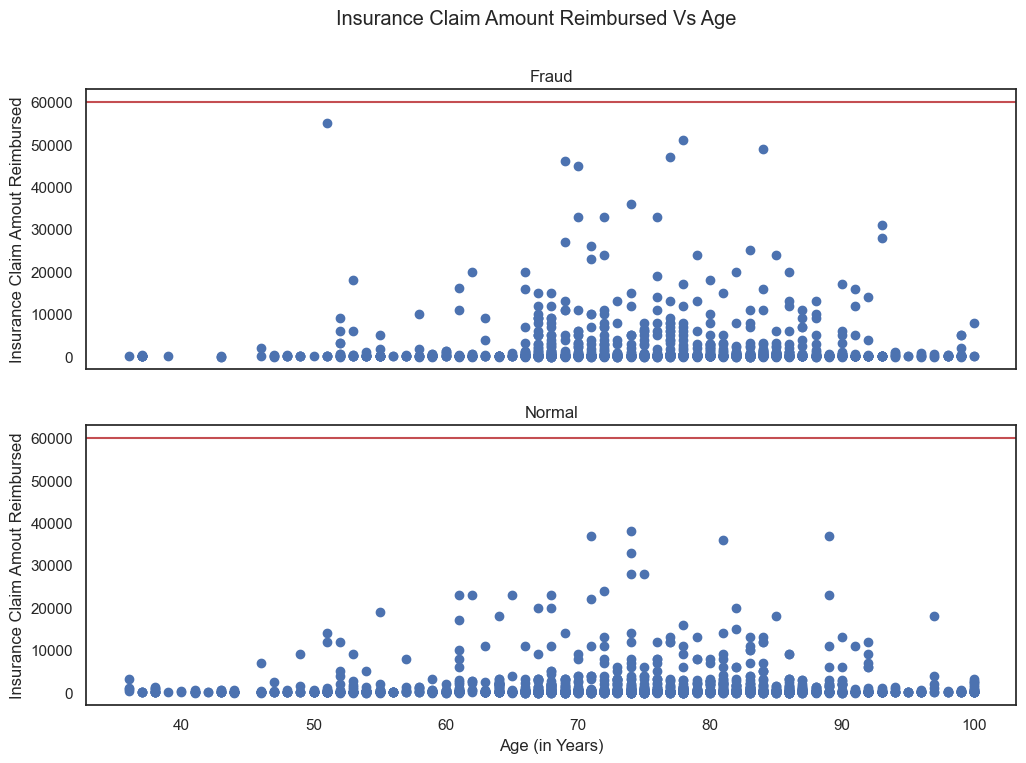

In [39]:
## Let's See Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(data[data.PotentialFraud=='Yes'].Age, 
            data[data.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(data[data.PotentialFraud=='No'].Age, 
            data[data.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

In [40]:
Train = Train_ProviderWithPatientDetailsdata
Test = Test_ProviderWithPatientDetailsdata

In [41]:
Test_copy=Test
print('Shape of Test Copy :-',Test_copy.shape)

Shape of Test Copy :- (135392, 57)


In [42]:
# we will use the columns of test to merge the dataset
col_merge=Test.columns
## Lets add both test and train datasets

Test_data=pd.concat([Test,Train[col_merge]])

In [43]:
Test_data.iloc[[135392]]

Provider      BeneID   ClaimID ClaimStartDt ClaimEndDt  \
0  PRV51001  BENE102690  CLM49733   2009-05-04 2009-05-18   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   42000          PHY383193          PHY378091   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0      PHY389113               4241  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                   143800                  4272                      880   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                    70 NaN          0.0  

[1 rows x 57 columns]

In [44]:
Train["PerProviderAvg_InscClaimAmtReimbursed"]=Train.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train["PerProviderAvg_DeductibleAmtPaid"]=Train.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train["PerProviderAvg_IPAnnualReimbursementAmt"]=Train.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerProviderAvg_IPAnnualDeductibleAmt"]=Train.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerProviderAvg_OPAnnualReimbursementAmt"]=Train.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerProviderAvg_OPAnnualDeductibleAmt"]=Train.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerProviderAvg_Age"]=Train.groupby('Provider')['Age'].transform('mean')
Train["PerProviderAvg_NoOfMonths_PartACov"]=Train.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train["PerProviderAvg_NoOfMonths_PartBCov"]=Train.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train["PerProviderAvg_AdmitForDays"]=Train.groupby('Provider')['AdmitForDays'].transform('mean')

In [45]:
Test["PerProviderAvg_InscClaimAmtReimbursed"]=Test.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test["PerProviderAvg_DeductibleAmtPaid"]=Test.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test["PerProviderAvg_IPAnnualReimbursementAmt"]=Test.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerProviderAvg_IPAnnualDeductibleAmt"]=Test.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerProviderAvg_OPAnnualReimbursementAmt"]=Test.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerProviderAvg_OPAnnualDeductibleAmt"]=Test.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerProviderAvg_Age"]=Test.groupby('Provider')['Age'].transform('mean')
Test["PerProviderAvg_NoOfMonths_PartACov"]=Test.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test["PerProviderAvg_NoOfMonths_PartBCov"]=Test.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test["PerProviderAvg_AdmitForDays"]=Test.groupby('Provider')['AdmitForDays'].transform('mean')

In [46]:
print('Train',Train.shape)
Train.iloc[:,-10:].head(2)

print("Test ",Test.shape)
Test.iloc[:,-10:].head(4)

Train (558211, 68)
Test  (135392, 67)


PerProviderAvg_InscClaimAmtReimbursed  PerProviderAvg_DeductibleAmtPaid  \
0                             262.390244                          1.853659   
1                             262.390244                          1.853659   
2                             262.390244                          1.853659   
3                             262.390244                          1.853659   

   PerProviderAvg_IPAnnualReimbursementAmt  \
0                              5180.926829   
1                              5180.926829   
2                              5180.926829   
3                              5180.926829   

   PerProviderAvg_IPAnnualDeductibleAmt  \
0                            548.253659   
1                            548.253659   
2                            548.253659   
3                            548.253659   

   PerProviderAvg_OPAnnualReimbursementAmt  \
0                              2345.073171   
1                              2345.073171   
2                              2345.073171   
3                              2345.073171   

   PerProviderAvg_OPAnnualDeductibleAmt  PerProviderAvg_Age  \
0                             677.95122           61.333333   
1                             677.95122           61.333333   
2                             677.95122           61.333333   
3                             677.95122           61.333333   

   PerProviderAvg_NoOfMonths_PartACov  PerProviderAvg_NoOfMonths_PartBCov  \
0                            11.82439                                12.0   
1                            11.82439                                12.0   
2                            11.82439                                12.0   
3                            11.82439                                12.0   

   PerProviderAvg_AdmitForDays  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN

In [47]:
## Grouping based on BeneID explains amounts involved per beneficiary.Reason to derive this feature is that one beneficiary 
## can go to multiple providers and can be involved in fraud cases
Train["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train["PerBeneIDAvg_DeductibleAmtPaid"]=Train.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerBeneIDAvg_AdmitForDays"]=Train.groupby('BeneID')['AdmitForDays'].transform('mean')

In [48]:
Test["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test["PerBeneIDAvg_DeductibleAmtPaid"]=Test.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerBeneIDAvg_AdmitForDays"]=Test.groupby('BeneID')['AdmitForDays'].transform('mean')

In [49]:
Train["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_AdmitForDays"]=Train.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

In [50]:
Train["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOtherPhysicianAvg_AdmitForDays"]=Train.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

Test["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerOtherPhysicianAvg_AdmitForDays"]=Test.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

In [51]:
Train["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_AdmitForDays"]=Train.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerOperatingPhysicianAvg_AdmitForDays"]=Test.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [52]:
Train["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_AdmitForDays"]=Train.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerAttendingPhysicianAvg_AdmitForDays"]=Test.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

In [53]:
Train["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [54]:
Train["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [55]:
Train["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

In [56]:
Train["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

In [57]:
Train["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

In [58]:
Train["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [59]:
Train["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [60]:
Train["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [61]:
Train["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3798006719.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3798006719.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
C:\Users\Administr

In [62]:
Train["ClmCount_Provider"]=Train.groupby(['Provider'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID"]=Train.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train["ClmCount_Provider_AttendingPhysician"]=Train.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_OtherPhysician"]=Train.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_OperatingPhysician"]=Train.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_1"]=Train.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_2"]=Train.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_3"]=Train.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_4"]=Train.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmProcedureCode_5"]=Train.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_1"]=Train.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_2"]=Train.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_3"]=Train.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_4"]=Train.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_5"]=Train.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_6"]=Train.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_7"]=Train.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_8"]=Train.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_9"]=Train.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train["ClmCount_Provider_DiagnosisGroupCode"]=Train.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train["ClmCount_Provider_BeneID_AttendingPhysician"]=Train.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_OtherPhysician"]=Train.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_OperatingPhysician"]=Train.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test["ClmCount_Provider"]=Test.groupby(['Provider'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID"]=Test.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test["ClmCount_Provider_AttendingPhysician"]=Test.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_OtherPhysician"]=Test.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_OperatingPhysician"]=Test.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_1"]=Test.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_2"]=Test.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_3"]=Test.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_4"]=Test.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmProcedureCode_5"]=Test.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_1"]=Test.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_2"]=Test.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_3"]=Test.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_4"]=Test.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_5"]=Test.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_6"]=Test.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_7"]=Test.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_8"]=Test.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test["ClmCount_Provider_ClmDiagnosisCode_9"]=Test.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test["ClmCount_Provider_DiagnosisGroupCode"]=Test.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test["ClmCount_Provider_BeneID_AttendingPhysician"]=Test.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_OtherPhysician"]=Test.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_OperatingPhysician"]=Test.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3455447359.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train["ClmCount_Provider"]=Train.groupby(['Provider'])['ClaimID'].transform('count')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3455447359.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train["ClmCount_Provider_BeneID"]=Train.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3455447359.py:3: PerformanceWarning: DataFrame is h

In [63]:
print('Train_ProviderWithPatientDetailsdata shape-',Train.shape)
print('Test_ProviderWithPatientDetailsdata shape-',Test.shape)

Train_ProviderWithPatientDetailsdata shape- (558211, 187)
Test_ProviderWithPatientDetailsdata shape- (135392, 187)


In [64]:
## Lets Check unique values of ICD Diagnosis Codes

diagnosiscode_2chars=Train['ClmDiagnosisCode_1'].astype(str).str[0:2]

diagnosiscode_2chars.unique()

array(['42', 'V7', '59', '24', '78', '41', '56', '79', '35', '85', '51',
       'V4', '29', '38', 'na', '71', 'V1', '27', '60', '50', '57', '28',
       '91', '55', 'V5', '84', '15', '99', '82', '72', '19', '40', '58',
       '73', '70', '25', '46', '49', '44', '45', '18', '16', '68', '61',
       '47', '20', '33', '31', '88', '48', '53', '43', '36', '32', 'V6',
       '83', 'E8', '22', '17', 'V0', '34', '62', 'V8', '11', '30', '39',
       '80', '93', '52', '89', '23', '94', '54', 'V2', '26', '37', '87',
       '21', '69', '81', '90', '12', '92', '63', '64', '95', '66', '13',
       '74', '14', '98', '97', '75', 'E9', '96', '10', '77', '86', '65',
       '67', '76'], dtype=object)

In [65]:
##### Lets impute numeric columns with 0

cols1 = Train.select_dtypes([np.number]).columns
cols2 = Train.select_dtypes(exclude = [np.number]).columns

Train[cols1] = Train[cols1].fillna(value=0)
Test[cols1]=Test[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test.shape)

Test_ProviderWithPatientDetailsdata shape: (135392, 187)


In [66]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum infromation from them.

cols=Train.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD']

Train_category_removed=Train.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test.drop(axis=1,columns=remove_these_columns)

In [67]:
Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')

In [68]:
Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender'],drop_first=True)
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender'],drop_first=True)

In [69]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  \
135391  PRV57750                      20                0.0           0.0   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
135391     1                      0     45     910                   12   

        NoOfMonths_PartBCov  ...  ClmCount_Provider_DiagnosisGroupCode  \
135391                   12  ...                                   0.0   

        ClmCount_Provider_BeneID_AttendingPhysician  \
135391                                          1.0   

        ClmCount_Provider_BeneID_OtherPhysician  \
135391                                      0.0   

        ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
135391                                                0.0                

        ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
135391                                                1.0                

        ClmCount_Provider_BeneID_OperatingPhysician  \
135391                                          0.0   

        ClmCount_Provider_BeneID_ClmProcedureCode_1  \
135391                                          0.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
135391                                          1.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  \
135391                                                0.0                

        Gender_2  
135391      True  

[1 rows x 158 columns]

In [70]:
# Correct way to replace values without triggering FutureWarning
Train_category_removed['PotentialFraud'] = Train_category_removed['PotentialFraud'].replace({'Yes': 1, 'No': 0}).astype('int64')

# Check data type and minimum value
print(Train_category_removed['PotentialFraud'].dtypes)
print(Train_category_removed['PotentialFraud'].min())

int64
0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\1416043222.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_category_removed['PotentialFraud'] = Train_category_removed['PotentialFraud'].replace({'Yes': 1, 'No': 0}).astype('int64')


In [71]:
Train_category_removed.PotentialFraud.max()

1

In [72]:
print('Test Shape before removing',Test_category_removed.shape)

Test Shape before removing (135392, 158)


In [73]:
Test_category_removed=Test_category_removed.iloc[:135392]

In [74]:
Test_category_removed.tail()  

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  \
135387  PRV57750                      50                0.0           0.0   
135388  PRV57750                       0                0.0           0.0   
135389  PRV57750                     100                0.0           0.0   
135390  PRV57750                      20                0.0           0.0   
135391  PRV57750                      20                0.0           0.0   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
135387     2                      0     45     910                   12   
135388     5                      0     45     910                   12   
135389     1                      0     45     910                   12   
135390     1                      0     45     910                   12   
135391     1                      0     45     910                   12   

        NoOfMonths_PartBCov  ...  ClmCount_Provider_DiagnosisGroupCode  \
135387                   12  ...                                   0.0   
135388                   12  ...                                   0.0   
135389                   12  ...                                   0.0   
135390                   12  ...                                   0.0   
135391                   12  ...                                   0.0   

        ClmCount_Provider_BeneID_AttendingPhysician  \
135387                                          1.0   
135388                                          1.0   
135389                                          1.0   
135390                                          1.0   
135391                                          1.0   

        ClmCount_Provider_BeneID_OtherPhysician  \
135387                                      0.0   
135388                                      0.0   
135389                                      0.0   
135390                                      0.0   
135391                                      0.0   

        ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
135387                                                0.0                
135388                                                0.0                
135389                                                0.0                
135390                                                0.0                
135391                                                0.0                

        ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
135387                                                1.0                
135388                                                1.0                
135389                                                1.0                
135390                                                1.0                
135391                                                1.0                

        ClmCount_Provider_BeneID_OperatingPhysician  \
135387                                          0.0   
135388                                          0.0   
135389                                          1.0   
135390                                          0.0   
135391                                          0.0   

        ClmCount_Provider_BeneID_ClmProcedureCode_1  \
135387                                          0.0   
135388                                          0.0   
135389                                          0.0   
135390                                          0.0   
135391                                          0.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
135387                                          1.0   
135388                                          1.0   
135389                                          1.0   
135390                                          1.0   
135391                                          1.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  \
135387                                                

In [75]:
Train_category_removed.head()

Provider  PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001               0                   42000             1068.0   
1  PRV51001               0                      90                0.0   
2  PRV51001               0                      20                0.0   
3  PRV51001               0                     100                0.0   
4  PRV51001               0                     200                0.0   

   AdmitForDays  Race  RenalDiseaseIndicator  State  County  \
0          15.0     1                      1      1     160   
1           0.0     1                      1      1     440   
2           0.0     1                      1      1     660   
3           0.0     1                      0      1     440   
4           0.0     1                      0      1     380   

   NoOfMonths_PartACov  ...  ClmCount_Provider_DiagnosisGroupCode  \
0                   12  ...                                   1.0   
1                   12  ...                                   0.0   
2                   12  ...                                   0.0   
3                   12  ...                                   0.0   
4                   12  ...                                   0.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                      1.0   
1                                      0.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                1.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  Gender_2  
0                                                1.0                   True  
1                                                0.0                   True  
2                                                0.0                  False  
3                                                0.0                   True  
4                                                0.0           

In [76]:
data=Train_ProviderWithPatientDetailsdata.select_dtypes(include=[np.number])
data.head()
df = data.iloc[:,2:85]

df.columns

Index(['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'AdmitForDays', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'WhetherDead',
       'PerProviderAvg_InscClaimAmtReimbursed',
       'PerProviderAvg_DeductibleAmtPaid',
       'PerProviderAvg_IPAnnualReimbursementAmt',
       'PerProviderAvg_IPAnnualDeductibleAmt',
       'PerProviderAvg_OPAnnualReimbursementAmt

<Axes: >

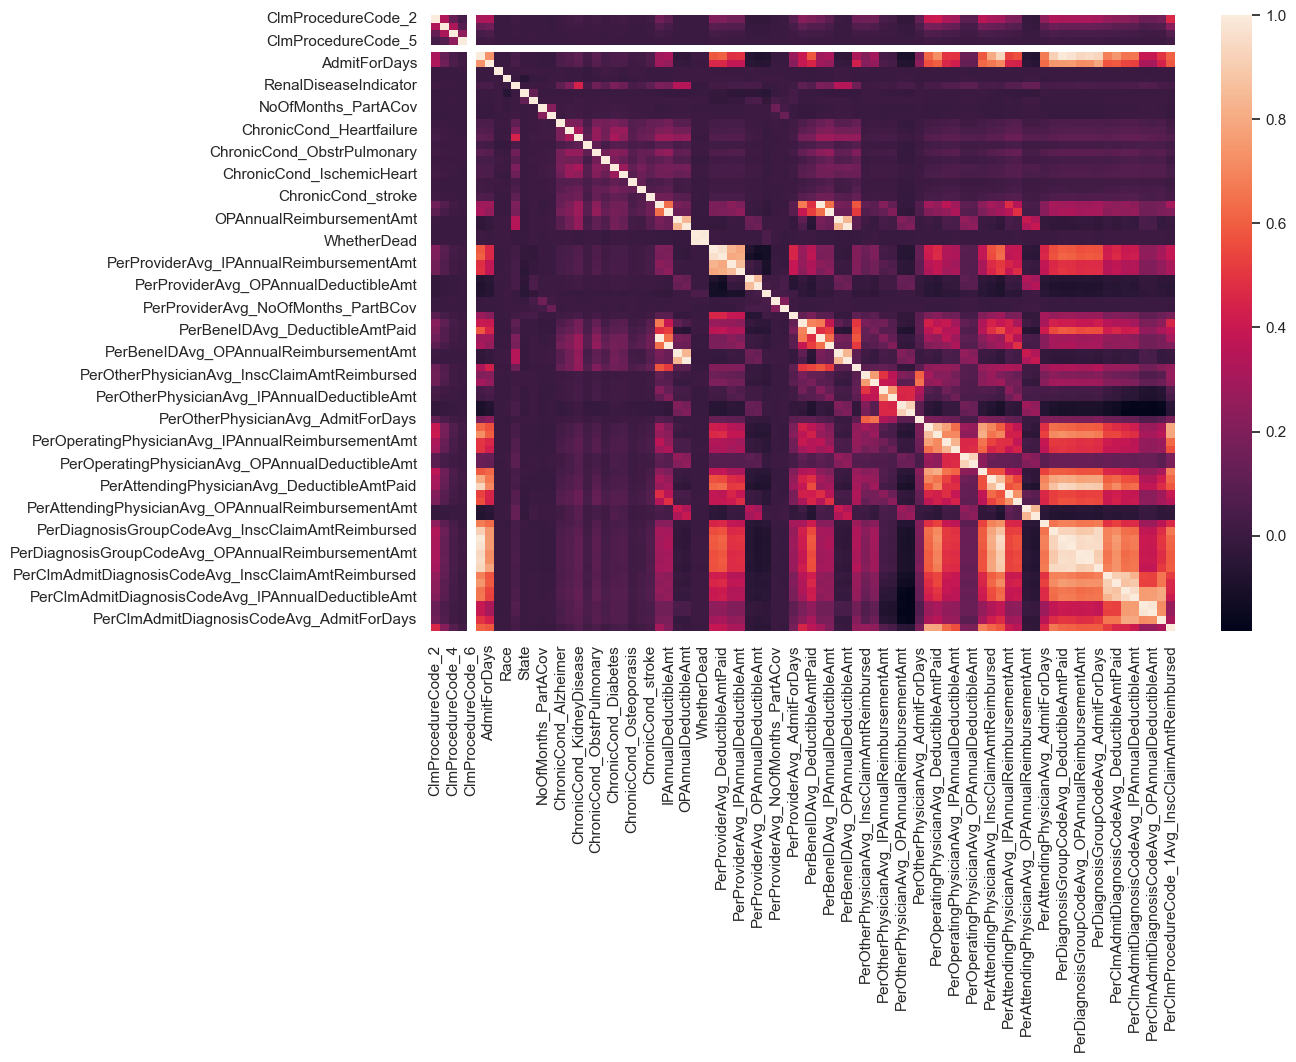

In [77]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr)

In [78]:
non_numeric_cols = ['BeneID', 'ClaimID', 'Provider', 'PotentialFraud', 'AttendingPhysician', 
                    'OperatingPhysician', 'OtherPhysician', 'RenalDiseaseIndicator', 'Gender', 'ClaimStartDt', 
                    'ClaimEndDt', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 
                    'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                    'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD']

for col in non_numeric_cols:
    if col in Train_ProviderWithPatientDetailsdata.columns:
        Train_ProviderWithPatientDetailsdata[col] = Train_ProviderWithPatientDetailsdata[col].astype('category').cat.codes

In [79]:
Train_ProviderWithPatientDetailsdata.head()

Provider  PotentialFraud  BeneID  ClaimID  ClaimStartDt  ClaimEndDt  \
0         0               0    2520   326625           156         138   
1         0               0    5700   257815           199         167   
2         0               0   16866   535695           383         351   
3         0               0   23194    50656            65          33   
4         0               0   26318   206182           167         135   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   42000               48046               19353   
1                      90               22912                  -1   
2                      20               47923                  -1   
3                     100               22912                  -1   
4                     200               29083               27165   

   OtherPhysician  ...  ClmCount_Provider_ClmDiagnosisCode_9  \
0           29577  ...                                   1.0   
1              -1  ...                                   0.0   
2           27269  ...                                   0.0   
3           13019  ...                                   0.0   
4           35724  ...                                   0.0   

   ClmCount_Provider_DiagnosisGroupCode  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                      1.0   
1                                      0.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                1.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0                                                1.0               
1                                                0.0

In [80]:
# Define numeric columns
numeric_cols = Train_ProviderWithPatientDetailsdata.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = Train_ProviderWithPatientDetailsdata[numeric_cols].corr()

In [81]:
correlation_with_fraud = correlation_matrix['PotentialFraud'].sort_values(ascending=False)
print(correlation_with_fraud)

PotentialFraud                                 1.000000
ClmCount_Provider                              0.515476
PerProviderAvg_Age                             0.314055
ClmCount_Provider_AttendingPhysician           0.300484
PerProviderAvg_AdmitForDays                    0.292533
                                                 ...   
ClmCount_Provider_BeneID_AttendingPhysician   -0.021597
OtherPhysician                                -0.022770
State                                         -0.041872
Provider                                      -0.069309
ClmProcedureCode_6                                  NaN
Name: PotentialFraud, Length: 187, dtype: float64


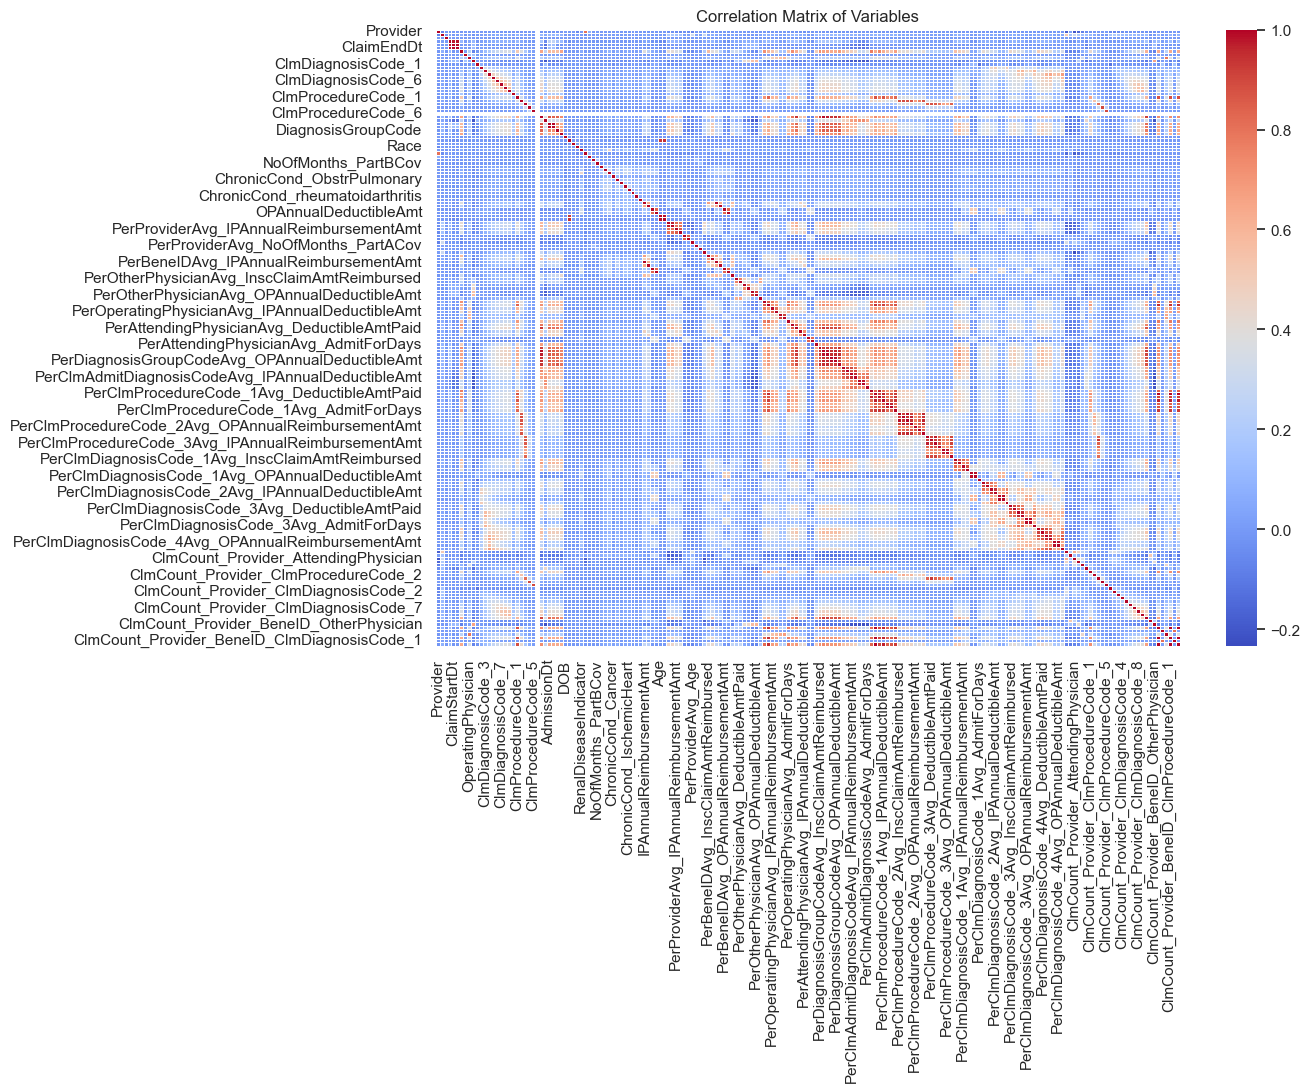

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

In [83]:
dataset_corr = Train_ProviderWithPatientDetailsdata.corr()['PotentialFraud'][:-1] # -1 because the latest row is Solar_power_generation
features_list = dataset_corr[abs(dataset_corr) > 0].sort_values(ascending=False)
print("There is {}  correlated values with Potential Fraud:\n{}".format(len(features_list), features_list))

There is 185  correlated values with Potential Fraud:
PotentialFraud                                 1.000000
ClmCount_Provider                              0.515476
PerProviderAvg_Age                             0.314055
ClmCount_Provider_AttendingPhysician           0.300484
PerProviderAvg_AdmitForDays                    0.292533
                                                 ...   
AttendingPhysician                            -0.016862
ClmCount_Provider_BeneID_AttendingPhysician   -0.021597
OtherPhysician                                -0.022770
State                                         -0.041872
Provider                                      -0.069309
Name: PotentialFraud, Length: 185, dtype: float64


In [84]:
remove_columns=['ClmProcedureCode_4','ChronicCond_rheumatoidarthritis','DOB','ClaimEndDt','ClmProcedureCode_5','ChronicCond_Osteoporasis','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','ChronicCond_Depression','ClaimStartDt','DOD','Gender','NoOfMonths_PartBCov',              
'Age','NoOfMonths_PartACov','ChronicCond_Cancer','ChronicCond_Diabetes','ChronicCond_Alzheimer','ClmDiagnosisCode_1','RenalDiseaseIndicator','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','OtherPhysician','BeneID','AttendingPhysician','Provider','ClaimID']

dataset_main = Train_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_columns)
dataset_main.shape
dataset_main.head()

PotentialFraud  InscClaimAmtReimbursed  OperatingPhysician  \
0               0                   42000               19353   
1               0                      90                  -1   
2               0                      20                  -1   
3               0                     100                  -1   
4               0                     200               27165   

   ClmDiagnosisCode_2  ClmDiagnosisCode_3  ClmDiagnosisCode_4  \
0                3067                 811                 443   
1                  -1                  -1                  -1   
2                3067                  -1                  -1   
3                  -1                  -1                  -1   
4                3212                 821                1058   

   ClmDiagnosisCode_5  ClmDiagnosisCode_6  ClmDiagnosisCode_7  \
0                 641                2036                 334   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                 971                1272                  -1   

   ClmDiagnosisCode_8  ...  ClmCount_Provider_ClmDiagnosisCode_9  \
0                1828  ...                                   1.0   
1                  -1  ...                                   0.0   
2                  -1  ...                                   0.0   
3                  -1  ...                                   0.0   
4                  -1  ...                                   0.0   

   ClmCount_Provider_DiagnosisGroupCode  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                      1.0   
1                                      0.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                1.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                                          1.0   
2 

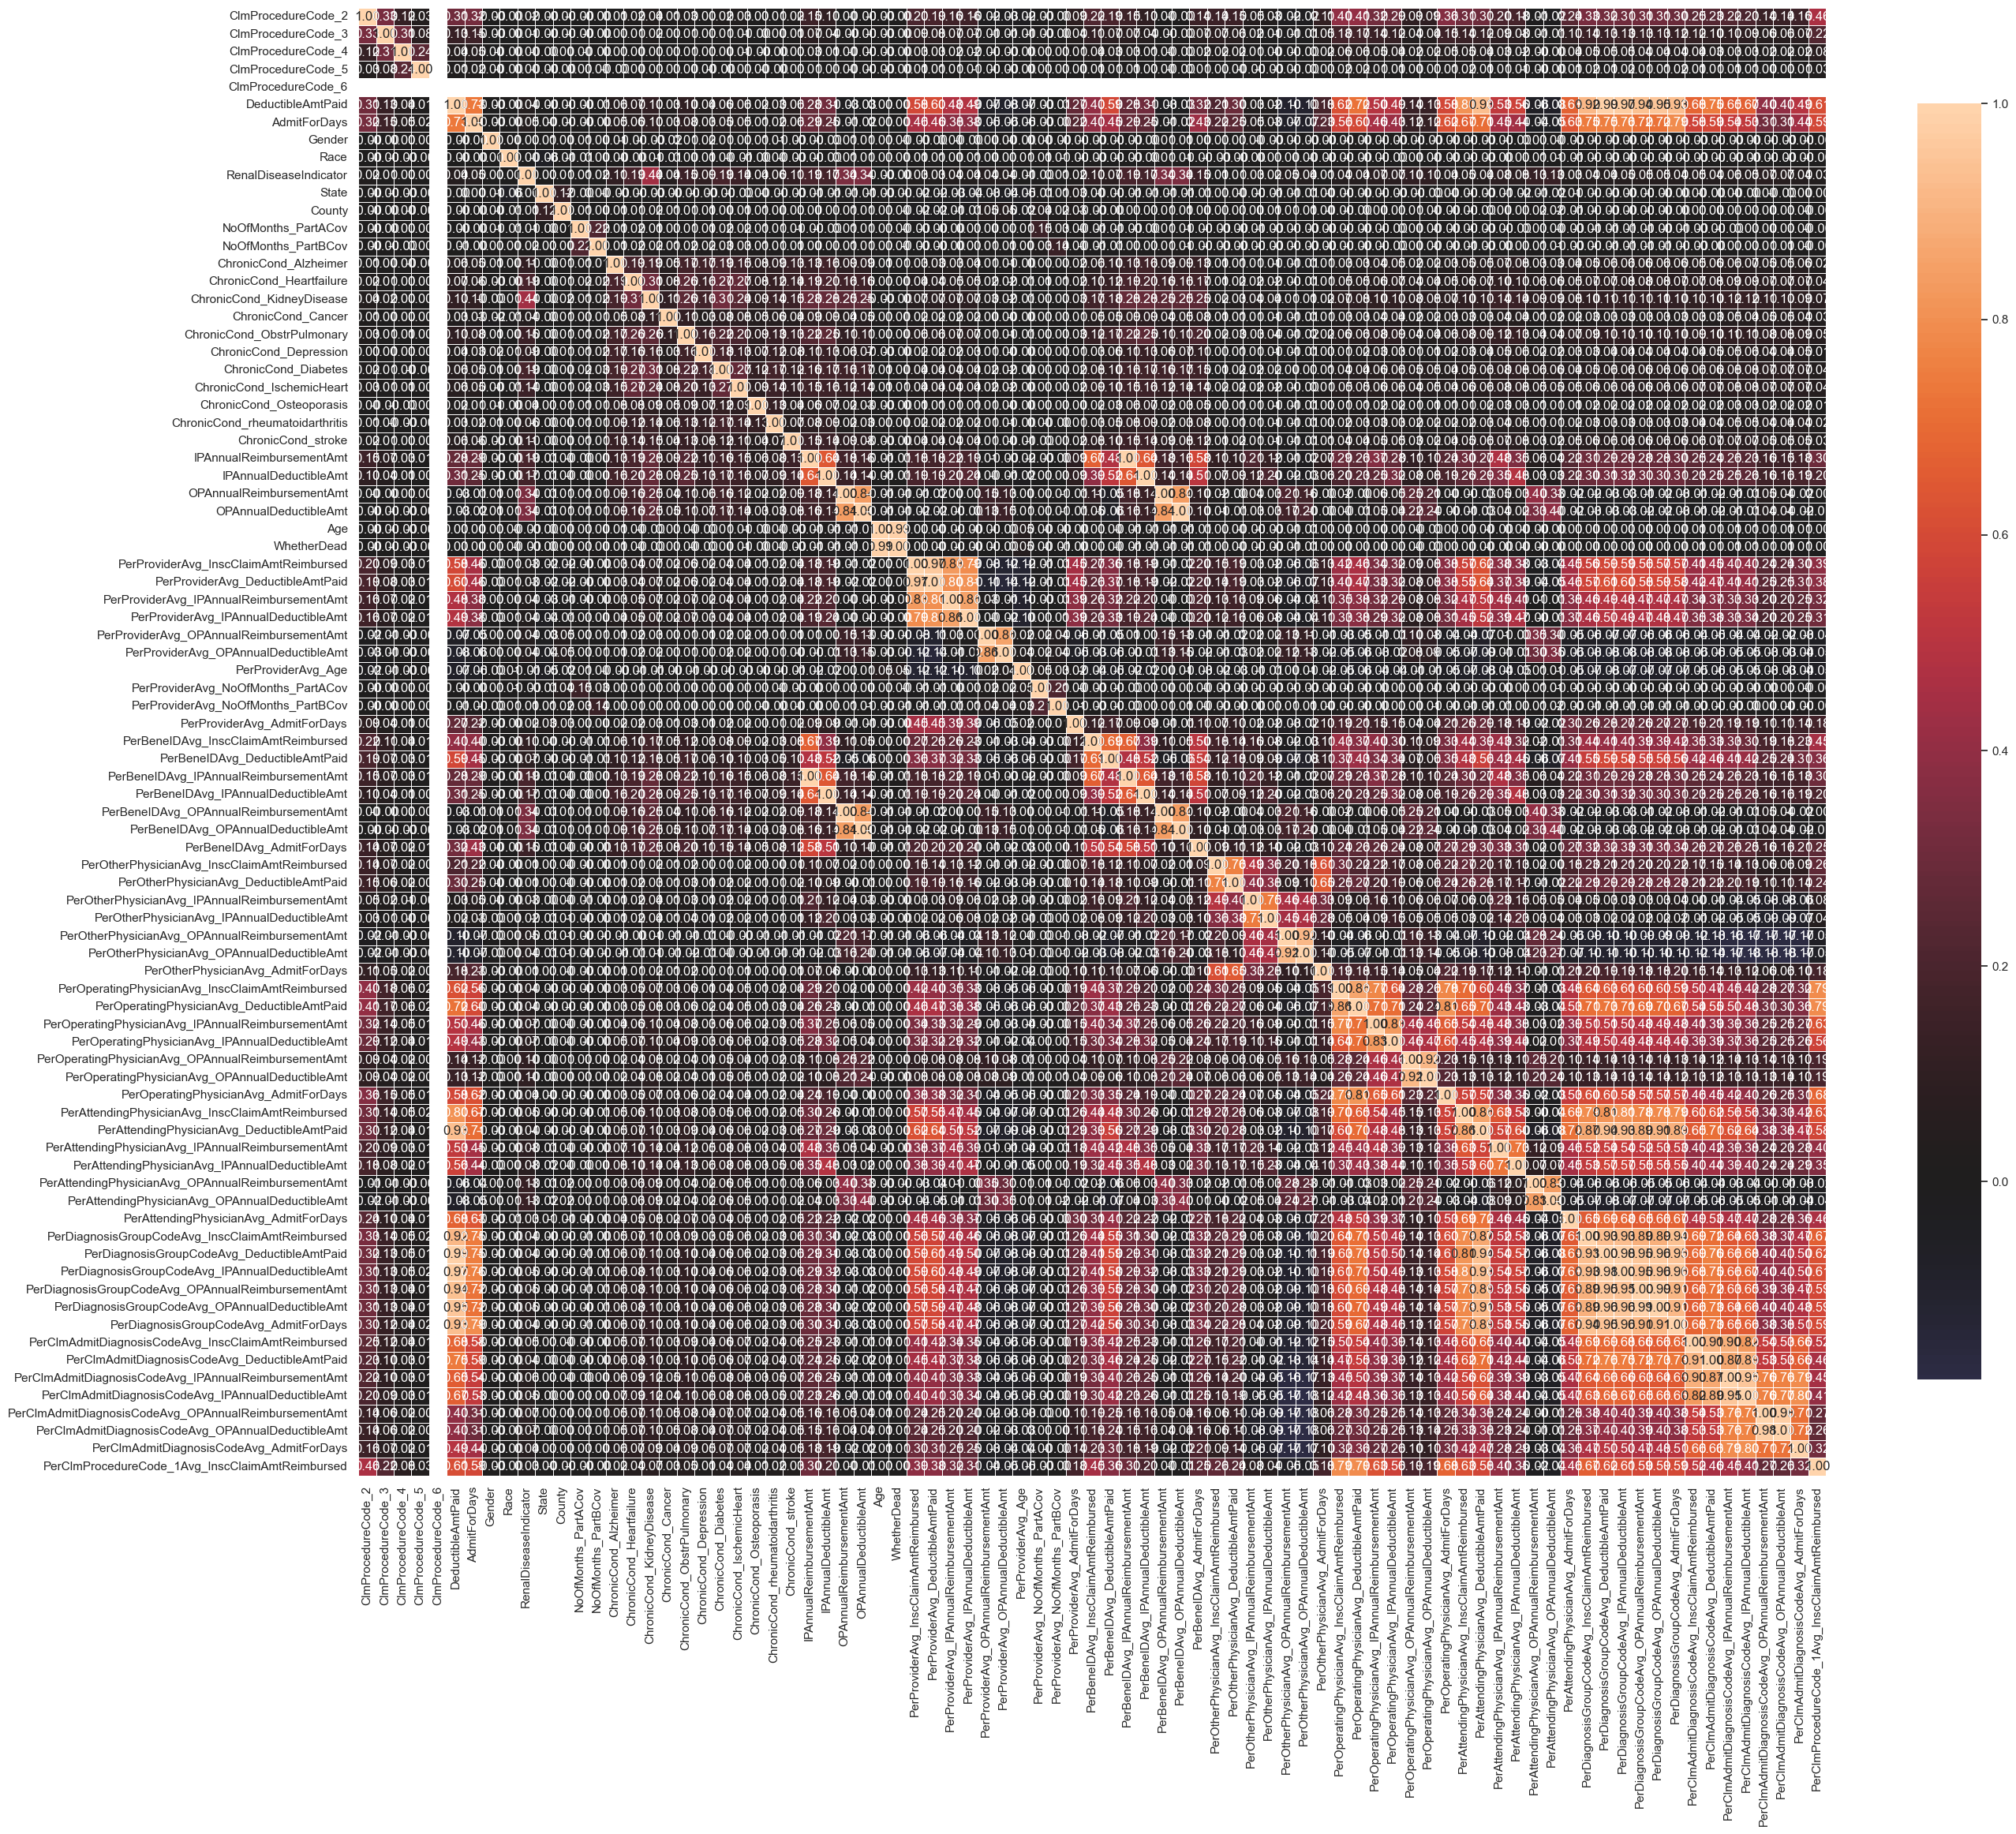

In [85]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [86]:
X = dataset_main.iloc[:,1:]
y = dataset_main.iloc[:,0]

In [87]:
X.head()

InscClaimAmtReimbursed  OperatingPhysician  ClmDiagnosisCode_2  \
0                   42000               19353                3067   
1                      90                  -1                  -1   
2                      20                  -1                3067   
3                     100                  -1                  -1   
4                     200               27165                3212   

   ClmDiagnosisCode_3  ClmDiagnosisCode_4  ClmDiagnosisCode_5  \
0                 811                 443                 641   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                 821                1058                 971   

   ClmDiagnosisCode_6  ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0                2036                 334                1828   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                1272                  -1                  -1   

   ClmDiagnosisCode_9  ...  ClmCount_Provider_ClmDiagnosisCode_9  \
0                1682  ...                                   1.0   
1                  -1  ...                                   0.0   
2                  -1  ...                                   0.0   
3                  -1  ...                                   0.0   
4                  -1  ...                                   0.0   

   ClmCount_Provider_DiagnosisGroupCode  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                      1.0   
1                                      0.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                1.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                           

In [88]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PotentialFraud, dtype: int8

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

#print(X_std[0:3,:])
#print(X_teststd[0:3,:])

In [90]:
print('X Shape:',X_std.shape)

X Shape: (558211, 158)


In [91]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [92]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (390747, 158)
y_train : (390747,)
X_val : (167464, 158)
y_val : (167464,)


In [93]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

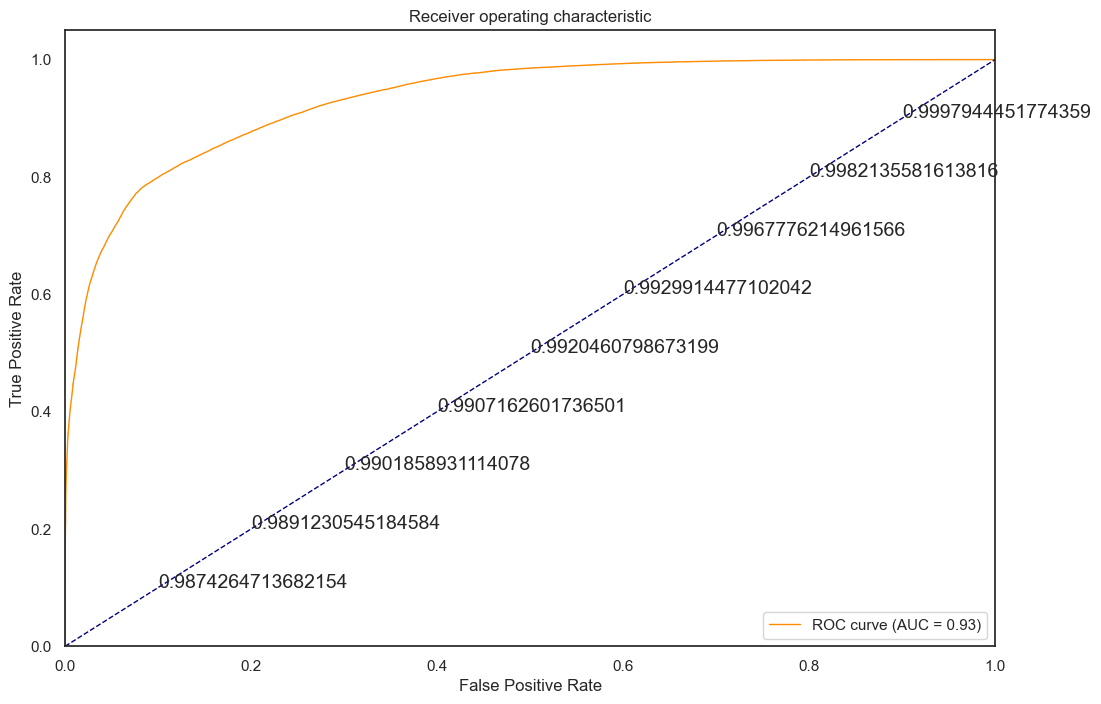

In [94]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.932604


In [96]:
log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[114124  34833]
 [ 17619 224171]]
Confusion Matrix Val: 
 [[48864 14975]
 [ 7600 96025]]
Accuracy Train:  0.8657648043363096
Accuracy Val:  0.8651949075622223
Sensitivity Train :  0.7661539907490081
Sensitivity Val:  0.7654255235827628
Specificity Train:  0.9271309814301667
Specificity Val:  0.9266586248492159
Kappa Value : 0.7077809274348235
AUC         : 0.8460420742159894
F1-Score Train  :  0.8131385821161382
F1-Score Val  :  0.8123488192314406


In [98]:
## Lets Apply Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   # We will set max_depth =4

In [100]:
rfc.fit(X_train,y_train)  #fit the model

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

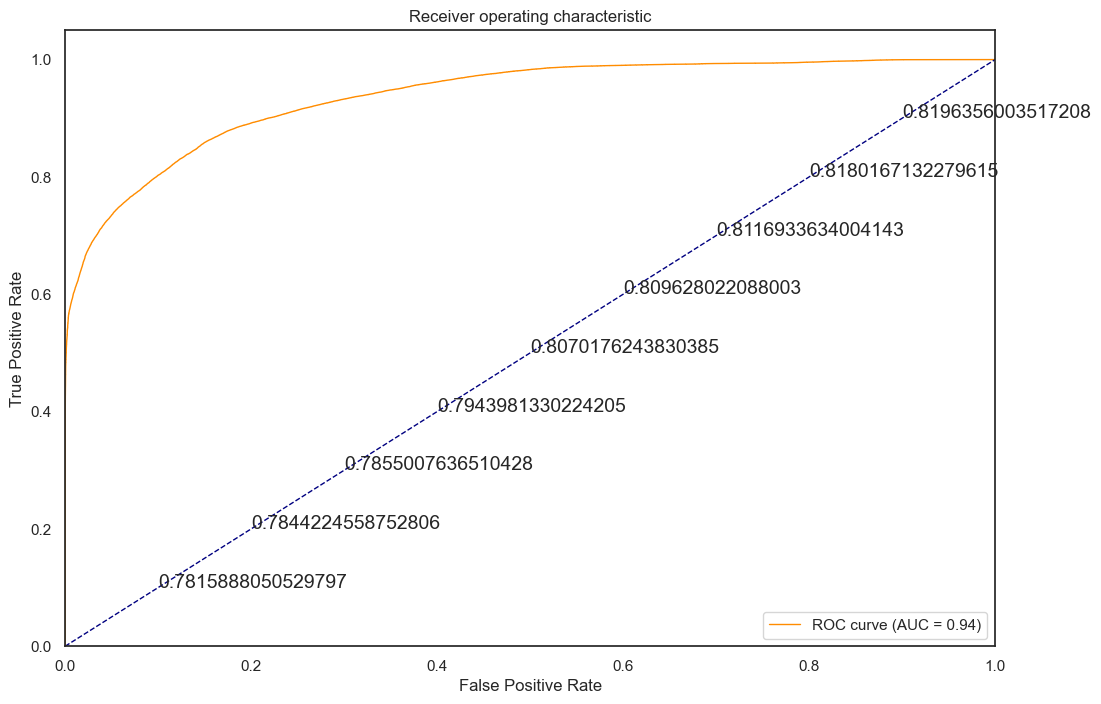

In [101]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [102]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)   # Set threshold to 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)# Set threshold to 0.5

In [103]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[124971  23986]
 [ 31589 210201]]
Confusion Matrix Test: 
 [[53554 10285]
 [13676 89949]]
Accuracy Train :  0.8577724205176239
Accuracy Test :  0.8569185018869727
Sensitivity :  0.8388915866476605
Specificity :  0.8680241254523522
Kappa Value : 0.699779973001982
AUC         : 0.8534578560500063
F1-Score Train 0.8180952287434087
F1-Score Validation :  0.8171878933996597


In [104]:
feature_list = list(dataset_main.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Top -20 features impacting Random forest model and their importance score :- \n',)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]];

Top -20 features impacting Random forest model and their importance score :- 

Variable: ClmCount_Provider    Importance: 0.22
Variable: PerProviderAvg_NoOfMonths_PartBCov Importance: 0.08
Variable: PerProviderAvg_AdmitForDays Importance: 0.08
Variable: PerProviderAvg_DeductibleAmtPaid Importance: 0.07
Variable: PerProviderAvg_Age   Importance: 0.07
Variable: PerProviderAvg_InscClaimAmtReimbursed Importance: 0.06
Variable: PerProviderAvg_NoOfMonths_PartACov Importance: 0.06
Variable: ClmCount_Provider_AttendingPhysician Importance: 0.05
Variable: PerProviderAvg_IPAnnualReimbursementAmt Importance: 0.04
Variable: PerProviderAvg_IPAnnualDeductibleAmt Importance: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_1 Importance: 0.03
Variable: PerProviderAvg_OPAnnualReimbursementAmt Importance: 0.02
Variable: PerAttendingPhysicianAvg_DeductibleAmtPaid Importance: 0.02
Variable: ClmCount_Provider_ClmDiagnosisCode_2 Importance: 0.02
Variable: PerProviderAvg_OPAnnualDeductibleAmt Importance: 0.

In [105]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

In [106]:
X = dataset_main.iloc[:,1:26]
y = dataset_main.iloc[:,0]


train_features,test_features,train_labels,test_labels=train_test_split(X,y,train_size=0.80,random_state=10)
train_features=normalize(train_features)
test_features=normalize(test_features)

In [107]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, algorithm="elkan", max_iter=10000, n_init=10)
kmeans.fit(train_features)
kmeans_predicted_train_labels = kmeans.predict(train_features)
kmeans_predicted_train_labels[:10]

array([2, 0, 3, 2, 2, 2, 0, 0, 1, 1])

In [108]:
centroids = kmeans.cluster_centers_
centroids

array([[ 7.18928647e-02,  6.61470481e-03,  6.97554148e-01,
         3.09829963e-01,  1.48258791e-01,  6.74417080e-02,
         3.62068361e-02,  2.13727963e-02,  1.28384225e-02,
         7.32388120e-03, -1.21814611e-04,  2.84658332e-04,
         2.43574547e-05,  1.67078736e-07,  0.00000000e+00,
         2.58476344e-03,  5.69110550e-02, -7.91113915e-05,
        -1.21027589e-04,  8.22761349e-05,  7.42508195e-06,
         4.66017384e-04,  9.33990367e-03,  1.26589148e-01,
         1.10115797e-04],
       [ 2.45028591e-01, -3.29458657e-03,  1.17601791e-02,
        -1.94860545e-03, -3.53202811e-03, -3.75452179e-03,
        -3.79120443e-03, -3.79734869e-03, -3.79734869e-03,
        -3.79734869e-03, -3.79734869e-03, -1.70002901e-16,
         5.06322415e-16, -1.09179159e-16,  0.00000000e+00,
         7.31912121e-03,  2.51175925e-03, -3.79466450e-03,
        -3.79464788e-03, -3.79734038e-03,  2.99166881e-07,
         4.76033848e-03,  8.96725723e-02,  9.13635170e-01,
         1.04886099e-03],
    

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict test labels using kmeans
kmeans_predicted_test_labels = kmeans.predict(test_features)

# Check unique values in test labels
print("Unique values in test_labels:", np.unique(test_labels))
print("Unique values in kmeans_predicted_test_labels:", np.unique(kmeans_predicted_test_labels))

Unique values in test_labels: [0 1]
Unique values in kmeans_predicted_test_labels: [0 1 2 3]


In [110]:
# Predicting the labels for the test features using kmeans
kmeans_predicted_test_labels = kmeans.predict(test_features)

# Calculating confusion matrix for kmeans
confusion_matrix(test_labels, kmeans_predicted_test_labels).ravel()

# Scoring kmeans
kmeans_accuracy_score = accuracy_score(test_labels, kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels, kmeans_predicted_test_labels, average='macro')
kmeans_recall_score = recall_score(test_labels, kmeans_predicted_test_labels, average='macro')
kmeans_f1_score = f1_score(test_labels, kmeans_predicted_test_labels, average='macro')

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, kmeans_predicted_test_labels)

print("")
print("K-Means")
print("Confusion Matrix")
print(cm)

if cm.shape == (2, 2):
	tn, fp, fn, tp = cm.ravel()
	print("tn =", tn, "fp =", fp)
	print("fn =", fn, "tp =", tp)
else:
	print("Confusion matrix is not 2x2, cannot unpack values.")

print("Scores")
print("Accuracy -->", kmeans_accuracy_score)
print("Precison -->", kmeans_precison_score)
print("Recall -->", kmeans_recall_score)
print("F1 -->", kmeans_f1_score)


K-Means
Confusion Matrix
[[29894 15558 12274 11498]
 [17551  9037  7962  7869]
 [    0     0     0     0]
 [    0     0     0     0]]
Confusion matrix is not 2x2, cannot unpack values.
Scores
Accuracy --> 0.3487097265390575
Precison --> 0.24937733403595835
Recall --> 0.16122144320839332
F1 --> 0.19554079001430344


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN with kd_tree algorithm and parallel processing
knn = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree", n_jobs=-1)

# Fit the model (Fix: Use .to_numpy() instead of .ravel())
knn.fit(train_features, train_labels.to_numpy())

# Predict labels on test set
knn_predicted_test_labels = knn.predict(test_features)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_labels, knn_predicted_test_labels).ravel()

# Compute scores
knn_accuracy_score = accuracy_score(test_labels, knn_predicted_test_labels)
knn_precision_score = precision_score(test_labels, knn_predicted_test_labels, zero_division=0)
knn_recall_score = recall_score(test_labels, knn_predicted_test_labels, zero_division=0)
knn_f1_score = f1_score(test_labels, knn_predicted_test_labels, zero_division=0)

# Print results
print("\nK-Nearest Neighbors")
print("Confusion Matrix")
print(f"TN = {tn}, FP = {fp}")
print(f"FN = {fn}, TP = {tp}")
print("Scores")
print(f"Accuracy  --> {knn_accuracy_score:.4f}")
print(f"Precision --> {knn_precision_score:.4f}")
print(f"Recall    --> {knn_recall_score:.4f}")
print(f"F1 Score  --> {knn_f1_score:.4f}")


K-Nearest Neighbors
Confusion Matrix
TN = 50805, FP = 18419
FN = 25850, TP = 16569
Scores
Accuracy  --> 0.6035
Precision --> 0.4736
Recall    --> 0.3906
F1 Score  --> 0.4281


In [113]:
from sklearn import svm
from sklearn import metrics

In [114]:
svcmodel= svm.SVC(kernel='linear')

In [ ]:
svcmodel.fit(train_features, train_labels)

In [ ]:
svmpred= svcmodel.predict(test_features)

In [ ]:
print ("Accuracy=",metrics.accuracy_score(test_labels,svmpred))
print ("Precision=",metrics.precision_score(test_labels,svmpred))
print ("Recall=",metrics.recall_score(test_labels,svmpred))